<a href="https://colab.research.google.com/github/samriddhi-m1227/Inferential-Statistics/blob/main/Inferential_27.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Practice Data Set

Kidney Stone Method Prediction

Source:
https://www.kaggle.com/datasets/utkarshxy/kidney-stone-data/data


###Introduction
In 1986, a group of urologists in London published a research paper in The British Medical Journal that compared the effectiveness of two different methods to remove kidney stones. Treatment A was open surgery (invasive), and treatment B was percutaneous nephrolithotomy (less invasive).
When they looked at the results from 700 patients, treatment B had a higher success rate. However, when they only looked at the subgroup of patients different kidney stone sizes, treatment A had a better success rate.

Simpon's paradox occurs when trends appear in subgroups but disappear or reverse when subgroups are combined.
  


###In this Project ->
medical data published in 1986 in "The British Medical Journal" where the effectiveness of two types of kidney stone removal treatments (A - open surgery and B - percutaneous nephrolithotomy) were compared.
Using multiple logistic regression and visualize model output to help the doctors determine if there is a difference between the two treatments. While not required, it will also help to have some knowledge of inferential statistics.



#### Content
The data contains three columns: treatment (A or B), stone_size (large or small) and success (0 = Failure or 1 = Success).




In [1]:
#Install the library
!pip install scipy       #statistcal libary for all the inferential tests

In [2]:
import pandas as pd
from scipy.stats import ttest_ind, chi2_contingency, f_oneway
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("kidney_stone_data.csv")

#EDA

In [4]:
data.head(25 )

,treatment,stone_size,success
0,B,large,1
1,A,large,1
2,A,large,0
3,A,large,1
4,A,large,1
5,B,large,1
6,A,small,1
7,B,large,1
8,B,small,1
9,A,large,1


In [ ]:
data.shape   #(rows,columns)

(700, 3)

In [ ]:
data.dtypes

treatment     object
stone_size    object
success        int64
dtype: object

In [ ]:
data.describe()

,success
count,700.000000
mean,0.802857
std,0.398126
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


In [ ]:
print("Columns Name: ")
print(data.columns)

print("\nData Types: ")
print(data.dtypes)


Columns Name: 
Index(['treatment', 'stone_size', 'success'], dtype='object')

Data Types: 
treatment     object
stone_size    object
success        int64
dtype: object


In [ ]:
#Measure of Central Tendency

print("\nMean: ")
print(data["success"].mean())

print("\nMedian: ")
print(data["success"].median())

print("\nMode: ")
print(data["success"].mode())


Mean: 
0.8028571428571428

Median: 
1.0

Mode: 
0    1
Name: success, dtype: int64


In [5]:
#Measure of dispersion

print("\nVariance: ")
print(data['success'].var)


print("\nStandard Dveiation: ")
print(data['success'].std())


print("\nRange: ")
print(data['success'].max()-data['success'].min())


Variance: 
<bound method NDFrame._add_numeric_operations.<locals>.var of 0      1
1      1
2      0
3      1
4      1
      ..
695    0
696    1
697    1
698    1
699    1
Name: success, Length: 700, dtype: int64>

Standard Dveiation: 
0.39812558983956453

Range: 
1


In [ ]:
#Skewness and Kurtosis

print("\nSkewness: ")
print(data['success'].skew())

print("\nKurtosis: ")
print(data['success'].kurtosis())


Skewness: 
-1.5257744597083363

Kurtosis: 
0.328919300191469


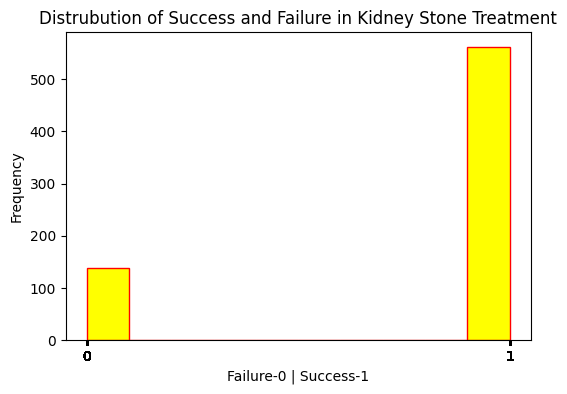

In [6]:
#Graph Analysis: Histogram
plt.figure(figsize=(6,4))
plt.hist(data["success"], color="yellow",edgecolor="red")
plt.xlabel("Failure-0 | Success-1")
plt.ylabel("Frequency")
plt.title("Distrubution of Success and Failure in Kidney Stone Treatment")
plt.xticks(data['success'])
plt.show()


Overall, there are significnatly more succcessful kidney stone treatments than Failures.

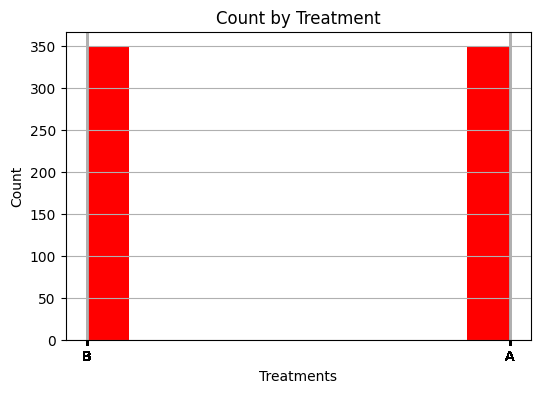

In [7]:
plt.figure(figsize=(6,4))
plt.hist(data['treatment'], color='red', label='count')
plt.xlabel("Treatments")
plt.ylabel("Count")
plt.title("Count by Treatment")
plt.xticks(data['treatment'])
plt.grid()
plt.show()


There is an equal number of Kidney stones in Treatment A and Treatment B, that sum upto a total of 700

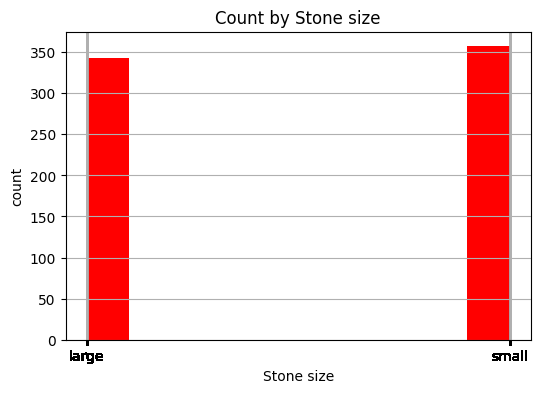

In [ ]:

plt.figure(figsize=(6,4)) #size the graph
plt.hist(data['stone_size'], color = 'red', label='sucess') #define all data
plt.xlabel("Stone size")
plt.ylabel("count")
plt.title("Count by Stone size")
plt.xticks(data['stone_size'])
plt.grid()
plt.show()


There are slightly more small kidney stones than large kidney stones in the dataset

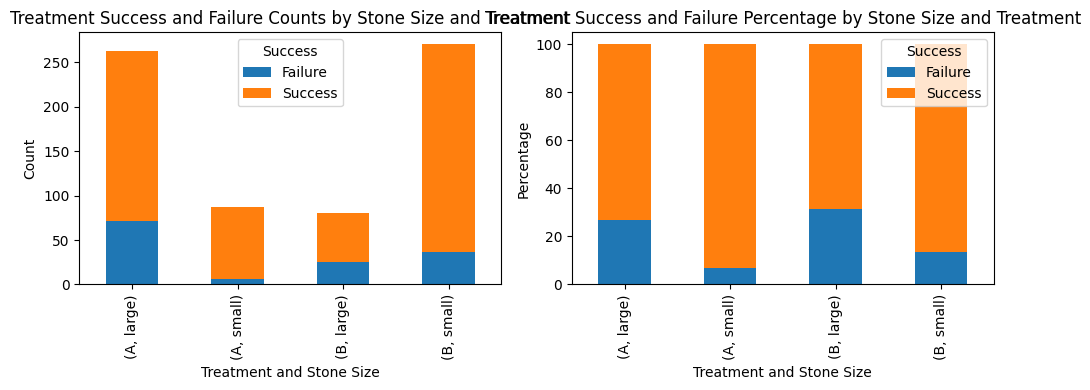

In [9]:
#Perform more detailed analysis by treatment
treatment_analysis=data.groupby(['treatment', 'stone_size', 'success']).size().unstack(fill_value=0)
treatment_analysis_percentage=treatment_analysis.div(treatment_analysis.sum(axis=1), axis=0)*100

#Display the data in table format
treatment_analysis, treatment_analysis_percentage

#Plotting the analysis
fig, axes,=plt.subplots(1,2,figsize=(10,4))

#Absolute counts
treatment_analysis.plot(kind='bar', stacked=True, ax=axes[0])
axes[0].set_title('Treatment Success and Failure Counts by Stone Size and Treatment')
axes[0].set_xlabel('Treatment and Stone Size')
axes[0].set_ylabel('Count')
axes[0].legend(title='Success', labels=['Failure', 'Success'])

#Percentage
treatment_analysis_percentage.plot(kind='bar', stacked=True, ax=axes[1])
axes[1].set_title('Treatment Success and Failure Percentage by Stone Size and Treatment')
axes[1].set_xlabel('Treatment and Stone Size')
axes[1].set_ylabel('Percentage')
axes[1].legend(title='Success', labels=['Failure', 'Success'])

plt.tight_layout()
plt.show()

#T-Tests

- Ho: There is no significant difference on the success rate of Treatment A and Treatment B
-H1: There is a significant differences between the success rate of Treatment A and Treatment B

In [ ]:
#Success Rate of Treatment A and Treatment B
success_A=data[data['treatment']=='A']['success']
success_B=data[data['treatment']=='B']['success']

#Perform Independent Sample T-Test
t_stats =ttest_ind(success_A, success_B)
print(t_stats)

TtestResult(statistic=-1.5204003013436962, pvalue=0.12886323855136153, df=698.0)


- The T-Test shows that p-value is greater than 0.05 which suggest that our findings are not statistically significant and  we do not have much reason to reject the null--there we can accpet the null hypothesis
- The statistic value supports our p values since it is a negative number; this means there is not a significant difference between the success rates of both treatments.

# Anova

- Ho: There is no signficant differences between the treatments of small and large kidney stones.
-H1: there is a signifcant difference between the treatments of small and large size kidney stones

In [ ]:
#Success Rate of Treatment A and Treatment B
success_small=data[data['stone_size']=='small']['success']
success_large=data[data['stone_size']=='large']['success']

anova= f_oneway(success_small, success_large)
print(anova)

F_onewayResult(statistic=30.264409926452775, pvalue=5.2953760011433365e-08)


- The Anova Test shows that the p-value is less than 0.05 which suggests that our findings are statistically significant and we have enough evidence to reject the null hypothesis.
- The statistic value supports our p value since it is a very large positive number. This indicates that there is a significant difference between the treatments of small and large kidney stones
